In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [3]:
mean = 842.5
sigma = np.sqrt(1784)
print(mean, sigma)

842.5 42.2374241639


In [9]:
N = 1000
RRI = np.random.normal(mean, sigma, size=N)

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


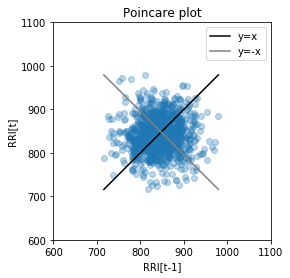

In [39]:
RRI_pre = RRI[:-1]
RRI_post = RRI[1:]

plt.scatter(RRI_pre, RRI_post, alpha=0.3)
plt.axes().set_aspect('equal')
plt.plot([RRI.min(), RRI.max()], [RRI.min(), RRI.max()], label="y=x", color="k")
plt.plot([RRI.min(), RRI.max()], [RRI.max(), RRI.min()], label="y=-x", color="gray")
plt.xlabel("RRI[t-1]")
plt.ylabel("RRI[t]")
plt.xlim([600, 1100])
plt.ylim([600, 1100])
plt.title("Poincare plot")
plt.legend()

171.241249462 163.800574064 1.04542520953


C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


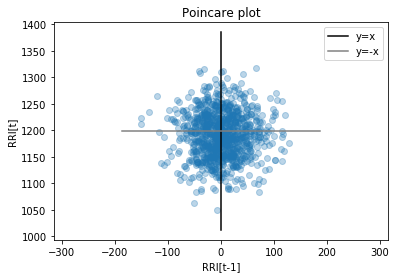

In [40]:
def rotate_n_deg(x, y, deg=45):
    assert len(x)==len(y)
    deg_n = np.deg2rad(deg)
    cos = np.cos(deg_n)
    sin = np.sin(deg_n)
    x_dash = []
    y_dash = []

    for i in range(len(x)):
        rot_x = (x[i] * cos) - (y[i] * sin)
        rot_y = (x[i] * sin) + (y[i] * cos)

        x_dash.append(rot_x)
        y_dash.append(rot_y)
        
    return np.array(x_dash), np.array(y_dash)

plt.scatter(*rotate_n_deg(RRI_pre, RRI_post), alpha=0.3)
plt.axes().set_aspect('equal', 'datalim')
plt.plot(*rotate_n_deg([RRI.min(), RRI.max()], [RRI.min(), RRI.max()]), label="y=x", color="k")
plt.plot(*rotate_n_deg([RRI.min(), RRI.max()], [RRI.max(), RRI.min()]), label="y=-x", color="gray")

rotated_x, rotated_y = rotate_n_deg(RRI_pre, RRI_post)
x_std = rotated_x.std()*4
y_std = rotated_y.std()*4
L=np.max([x_std, y_std])
T=np.min([x_std, y_std])
print(L, T, L/T)

plt.xlabel("RRI[t-1]")
plt.ylabel("RRI[t]")
plt.title("Poincare plot")
plt.legend()